In [1]:
%matplotlib notebook
import numpy as np
import time

from qastools.interpolation import interpolate_and_save, bin_data
from databroker import Broker
db = Broker.named("qas")
import matplotlib.pyplot as plt

In [2]:
uid= db[-1].start['uid']
#uid = "94ffd468-746c-4817-8740-30fa68780c50"

print(uid)
print(time.ctime(db[uid].start['time']))

res_dict = interpolate_and_save('qas', 'qas-analysis', uid, mono_name='mono1_enc', pulses_per_degree=None)
interp_df = res_dict['interp_df']
bin_df = res_dict['bin_df']

interp_df_filename = res_dict['interp_df_filename']
bin_df_filename = res_dict['interp_df_filename']


print("saved interp_df to {}".format(interp_df_filename))
print("saved bin_df to {}".format(bin_df_filename))

c1445750-5826-49af-80bf-414042caad10
Fri Apr  6 11:36:29 2018
subtracting offset
0.05049024916066667
subtracting offset
0.049551398034666676
Converting to energy, using key mono1_enc
saved interp_df to /nsls2/xf07bm/data/interpolated_data/2018/04/06/xas_Ti-30s-4966.txt_388-2.txt
saved bin_df to /nsls2/xf07bm/data/interpolated_data/2018/04/06/xas_Ti-30s-4966.txt_388-2.txt


In [3]:
hdr = db[-1]
stream = hdr.documents()

In [4]:
hdr.stream_names

['pb1_enc1', 'pba1_adc7', 'pba1_adc6']

In [5]:
print(db[uid].start)
print(db[uid].stop)


Run Start
PI              : No PI                                   
PROPOSAL        : None                                    
SAF             : None                                    
angle_offset    : -0.0998577922152                        
beamline_id     : QAS                                     
comment         :                                         
cycle           : 1                                       
e0              : 4966                                    
edge            : K                                       
element         : Titanium ( 22)                          
experiment      : transmission                            
group           : qas                                     
name            : Ti-30s-4966.txt                         
pba1_adc6 offset: 0.049551398034666676                    
pba1_adc7 offset: 0.05049024916066667                     
plan_args       :
plan_name       : execute_trajectory                      
plan_type       : generator

<IPython.core.display.Javascript object>


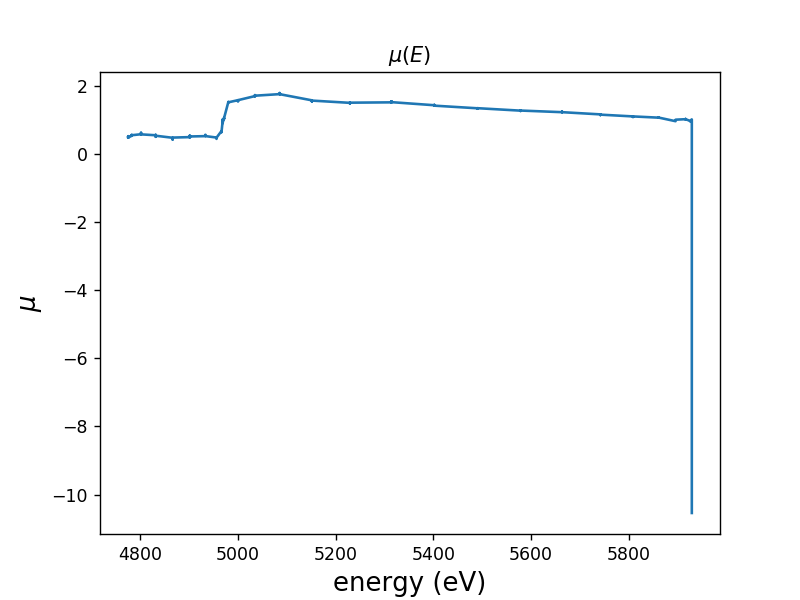

In [6]:

plt.figure(0);
#plt.plot(interp_df.energy, np.log(interp_df.i0/interp_df.it))

#plt.plot(interp_df.energy,interp_df.i0)
#plt.plot(interp_df.energy,interp_df.it)

plt.plot(interp_df.energy, np.log((interp_df.i0)/(interp_df.it)))

#plt.plot(interp_df.energy, np.log(interp_df.i0/interp_df.it))
#plt.plot(interp_df.energy)
plt.xlabel("energy (eV)", size=15)
plt.ylabel("$\mu$", size=15)
plt.title("$\mu (E)$")
#plt.plot(interp_df.energy,'+')

<IPython.core.display.Javascript object>


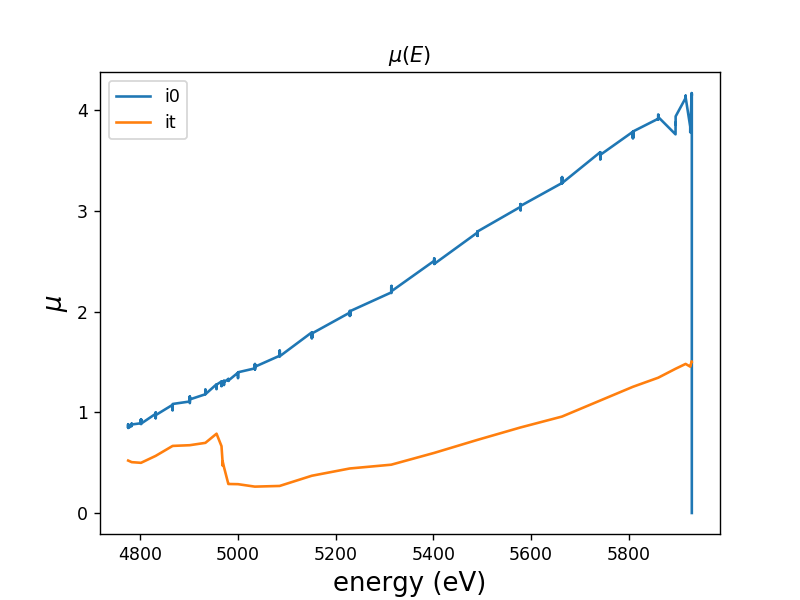

In [7]:
plt.figure(1);
#plt.plot(interp_df.energy, np.log(interp_df.i0/interp_df.it))

plt.plot(interp_df.energy,interp_df.i0, label='i0')
plt.plot(interp_df.energy,interp_df.it, label='it')

#plt.plot(interp_df.energy, np.log((interp_df.i0)/(interp_df.it+1)))

#plt.plot(interp_df.energy, np.log(interp_df.i0/interp_df.it))
#plt.plot(interp_df.energy)
plt.xlabel("energy (eV)", size=15)
plt.ylabel("$\mu$", size=15)
plt.title("$\mu (E)$")
plt.legend()
#plt.plot(interp_df.energy,'+')

<IPython.core.display.Javascript object>


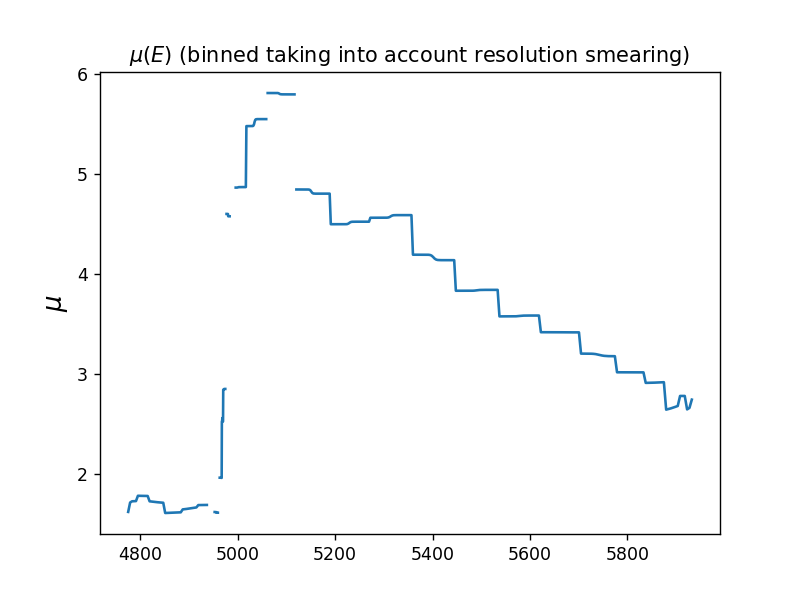

In [8]:
plt.figure(2)
plt.plot(bin_df.energy, (bin_df.i0/bin_df.it))
plt.ylabel("$\mu$", size=15)
plt.title("$\mu (E)$")
plt.title("$\mu (E)$ (binned taking into account resolution smearing)")

<IPython.core.display.Javascript object>


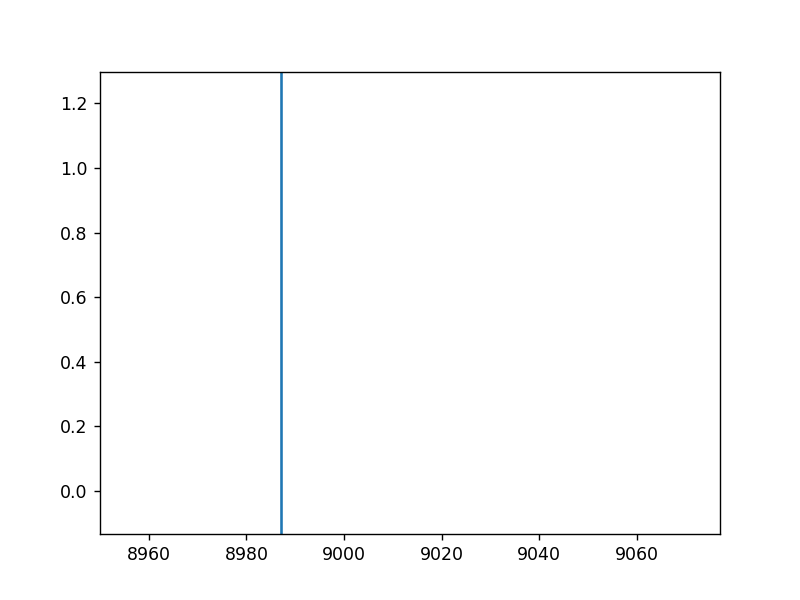

(8950, 9077)

In [9]:
# finding the edge
avg_energy = (bin_df.energy.values[1:] + bin_df.energy.values[:-1])*.5

plt.figure(3);plt.clf()
plt.plot(avg_energy, np.diff(np.log(bin_df.i0/bin_df.it))/np.diff(bin_df.energy))
plt.axvline(8987)
plt.xlim(8950, 9077)

In [10]:
file = open("/nsls2/xf07bm/data/pizza_box_data/2018/03/29/an_68044b","r")
output = open("/home/xf07bm/test1","w")

for line in file:
    current_line = line.split()
    current_line[3] = int(current_line[3], 0) >> 8
    #print(current_line[3])
    if current_line[3] > 0x1FFFF:
        current_line[3] -= 0x40000
    current_line[3] = float(current_line[3]) * 7.62939453125e-05
    #print(str(current_line[0]),  str(current_line[1]), str(current_line[2]), str(current_line[3]))
    output.write("%s" %str(current_line[0]) + "  " + "%s" %str(current_line[1]) + "  " + "%s" %str(current_line[2])
                  + "  " + "%s\n" %str(current_line[3]))

output.close()
file.close()


<IPython.core.display.Javascript object>


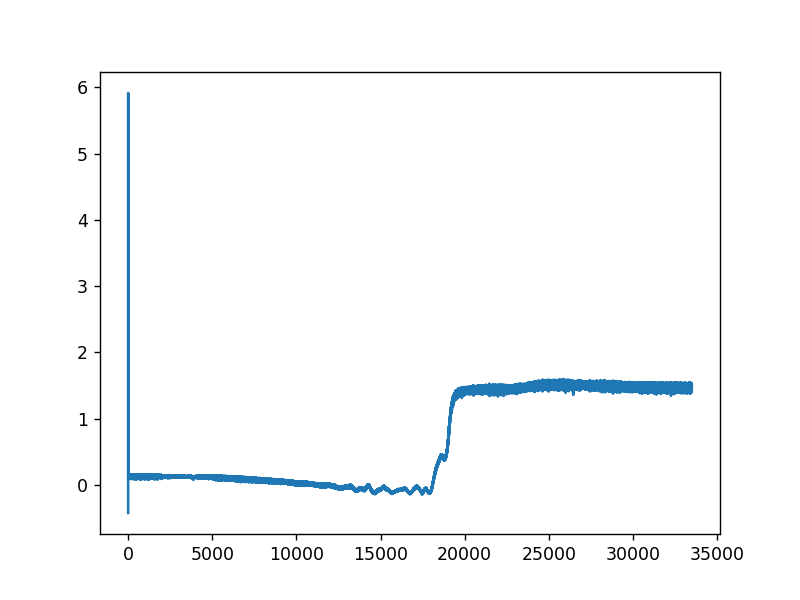

In [11]:
a=np.loadtxt('/home/xf07bm/test1')
a.shape
plt.figure(4)

plt.plot(a[:,3])

In [ ]:
a